In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
#Levelized cost ($/miles=MMBtu)
lc = 0.019108

In [75]:
#Distances
ds = np.array([1.30,1.20,1.20,1.20,1.20,1.20])
#ds = np.ones(8)

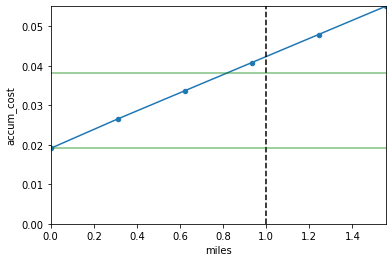

In [76]:
#Create initial cost dataframe ()
dfs =[(pd.DataFrame({'dist':[0],'cdist':[0],'accum_cost':[lc]}))]

#Initialize cost distance and total distance variables
cd0 = 0; dist = 0

#Iterate through cost values
for i in range(1,len(ds)):
    cd = (ds[i]+ds[i-1])/2 + cd0
    #Compute accumulated cost
    ac = (cd * lc * 500 / 1609.44) + lc
    #Update accumulators
    cd0 = cd; dist += 500# 
    #Construct row and add to row list
    dfs.append(pd.DataFrame({'dist':[dist],'cdist':[cd],'accum_cost':[ac]}))
    
#Merge dataframe rows
dfOut=pd.concat(dfs)

#Add distance in miles 
dfOut['miles'] = dfOut.dist / 1609.44

#Plot
x_axis = 'miles'; y_axis = 'accum_cost'
ax = dfOut.plot(x=x_axis,y=y_axis,legend=False,
                ylim=(0,dfOut[y_axis].max()),
                xlim=(0,dfOut[x_axis].max()))

dfOut.plot(kind='scatter',x=x_axis,y=y_axis,ax=ax)
ax.axvline(1, color='k', linestyle='--')
ax.axvline(2, color='k', linestyle='--')
ax.axhline(lc*1,color='g',alpha=0.5)
ax.axhline(lc*2,color='g',alpha=0.5)
ax.axhline(lc*3,color='g',alpha=0.5);

In [77]:
dfOut

,dist,cdist,accum_cost,miles
0,0,0.00,0.019108,0.000000
0,500,1.25,0.026528,0.310667
0,1000,2.45,0.033652,0.621334
0,1500,3.65,0.040775,0.932001
0,2000,4.85,0.047899,1.242668
0,2500,6.05,0.055022,1.553335
